# **Project: Generating Customized Multi-Class Classification Reports For Various Models**
**Intern Name:** Harshal Janjani

**Date:** 9th August 2023 - 10th August 2023

**Time:** 9th (6:00 PM) - 10th (4:00 PM)

To run, download **Train.csv** and **Test.csv** from the below Customer Segmentation Kaggle Dataset link:
https://www.kaggle.com/datasets/vetrirah/customer?resource=download

## **1.1. Importing The Required Libraries**

In [ ]:
!pip install catboost

In [ ]:
!pip3 install shap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import logging

import xgboost as xgb
import shap
import catboost
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## **1.2. Data Pre-Processing**

In [ ]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")
print(train_df.head())
print(test_df.head())

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  
       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes

In [ ]:
# Define features and target variable
X_train = train_df.drop(["ID", "Segmentation"], axis=1)
y_train = train_df["Segmentation"]
X_test = test_df.drop("ID", axis=1)

# Combine train and test data for consistent one-hot encoding
combined_df = pd.concat([X_train, X_test], axis=0)

# Convert categorical variables to numerical using one-hot encoding
combined_encoded = pd.get_dummies(combined_df)
X_train_encoded = combined_encoded[:len(X_train)]
X_test_encoded = combined_encoded[len(X_train):]

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_split)

# Fit OrdinalEncoder on the training labels and transform validation labels
label_encoder = OrdinalEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.reshape(-1, 1))

# Split the training data into train and validation sets (70-30 split)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train_encoded, test_size=0.3, random_state=42)

# **2. XGBoost Model**

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


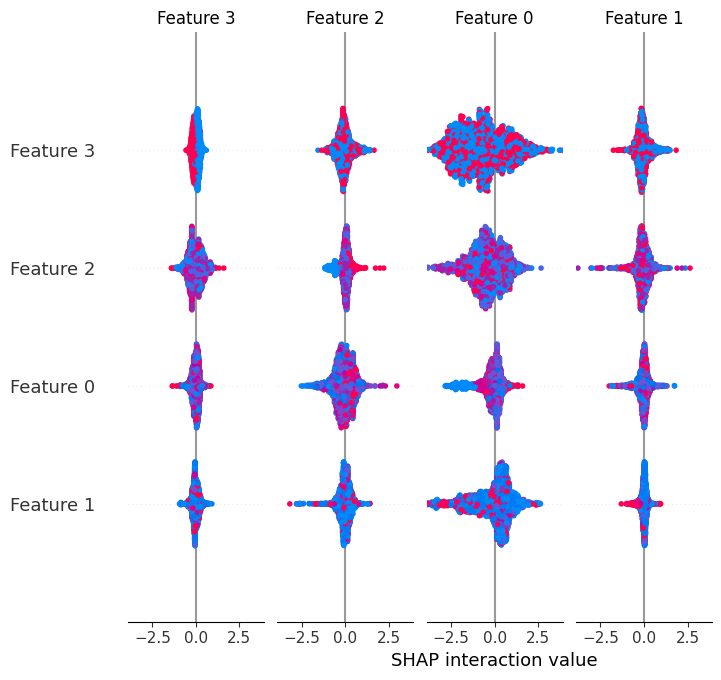

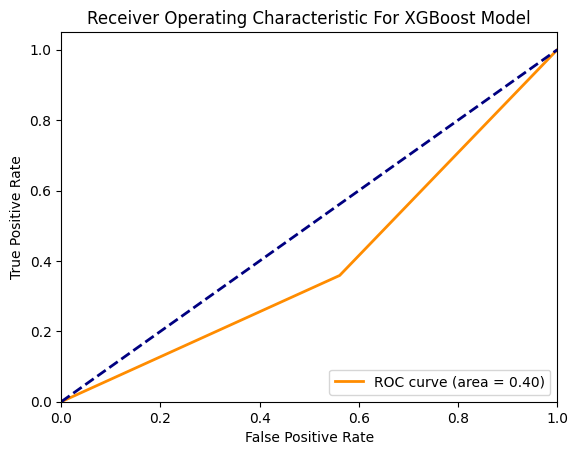

In [ ]:
# Initialize and train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_val_pred_encoded = model.predict(X_val_scaled)

# Convert encoded predictions back to original labels
y_val_pred_original = label_encoder.inverse_transform(y_val_pred_encoded.reshape(-1, 1))

# Convert y_val_encoded back to original labels
y_val_original = label_encoder.inverse_transform(y_val_split.reshape(-1, 1))

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val_original, y_val_pred_original)
confusion = confusion_matrix(y_val_original, y_val_pred_original)
classification_rep = classification_report(y_val_original, y_val_pred_original)
fpr, tpr, _ = roc_curve(y_val_split, y_val_pred_encoded, pos_label=model.classes_[1])
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
logging.info("Accuracy: %f", accuracy)
logging.info("Confusion Matrix:\n %s", confusion)
logging.info("Classification Report:\n %s", classification_rep)
logging.info("ROC AUC: %f", roc_auc)

# Calculate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_val_split)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_val_split, plot_type="bar")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic For XGBoost Model')
plt.legend(loc="lower right")
plt.show()

# **3. Catboost Model**

Learning rate set to 0.08643
0:	learn: 1.3430117	total: 11.6ms	remaining: 11.6s
1:	learn: 1.3033524	total: 23.2ms	remaining: 11.6s
2:	learn: 1.2765762	total: 32.9ms	remaining: 10.9s
3:	learn: 1.2518688	total: 52.2ms	remaining: 13s
4:	learn: 1.2303463	total: 64.7ms	remaining: 12.9s
5:	learn: 1.2124502	total: 75.4ms	remaining: 12.5s
6:	learn: 1.1951275	total: 90.7ms	remaining: 12.9s
7:	learn: 1.1805242	total: 102ms	remaining: 12.7s
8:	learn: 1.1684091	total: 114ms	remaining: 12.6s
9:	learn: 1.1578150	total: 128ms	remaining: 12.6s
10:	learn: 1.1479028	total: 140ms	remaining: 12.6s
11:	learn: 1.1390389	total: 152ms	remaining: 12.5s
12:	learn: 1.1302606	total: 165ms	remaining: 12.5s
13:	learn: 1.1223478	total: 175ms	remaining: 12.3s
14:	learn: 1.1163294	total: 187ms	remaining: 12.3s
15:	learn: 1.1094579	total: 202ms	remaining: 12.4s
16:	learn: 1.1020092	total: 214ms	remaining: 12.4s
17:	learn: 1.0963826	total: 227ms	remaining: 12.4s
18:	learn: 1.0912287	total: 239ms	remaining: 12.3s
19:	lea

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


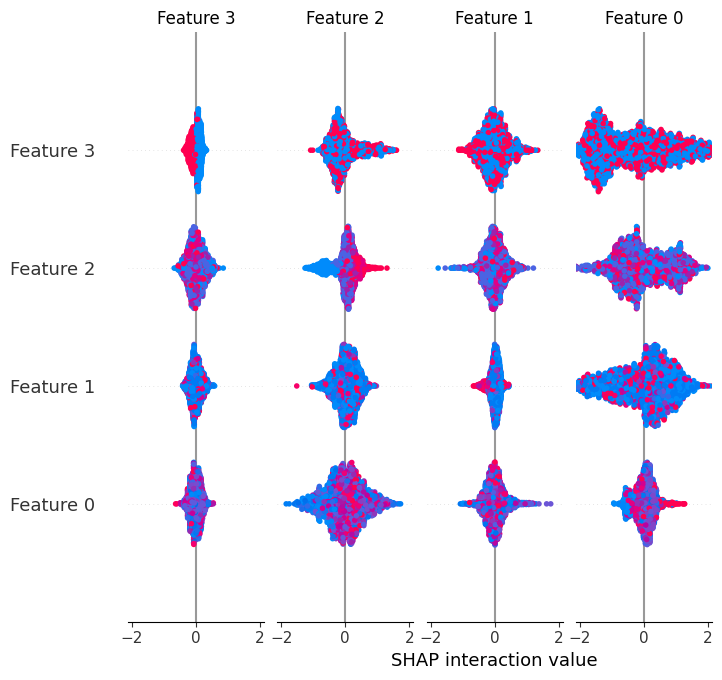

In [ ]:
# Initialize and train the CatBoost model
model = catboost.CatBoostClassifier()
model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_val_pred_encoded = model.predict(X_val_split)

# Convert encoded predictions back to original labels
y_val_pred_original = label_encoder.inverse_transform(y_val_pred_encoded)

# Convert y_val_encoded back to original labels
y_val_original = label_encoder.inverse_transform(y_val_split)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val_original, y_val_pred_original)
confusion = confusion_matrix(y_val_original, y_val_pred_original)
classification_rep = classification_report(y_val_original, y_val_pred_original, zero_division=1)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

# Calculate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_val_split)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_val_split, plot_type="bar", color='blue')

# **4. Logistic Regression**

Accuracy: 0.5039239983477901
Confusion Matrix:
 [[277  88 109 123]
 [174 117 199  62]
 [ 73  90 331  86]
 [142  22  33 495]]
Classification Report:
               precision    recall  f1-score   support

           A       0.42      0.46      0.44       597
           B       0.37      0.21      0.27       552
           C       0.49      0.57      0.53       580
           D       0.65      0.72      0.68       692

    accuracy                           0.50      2421
   macro avg       0.48      0.49      0.48      2421
weighted avg       0.49      0.50      0.49      2421



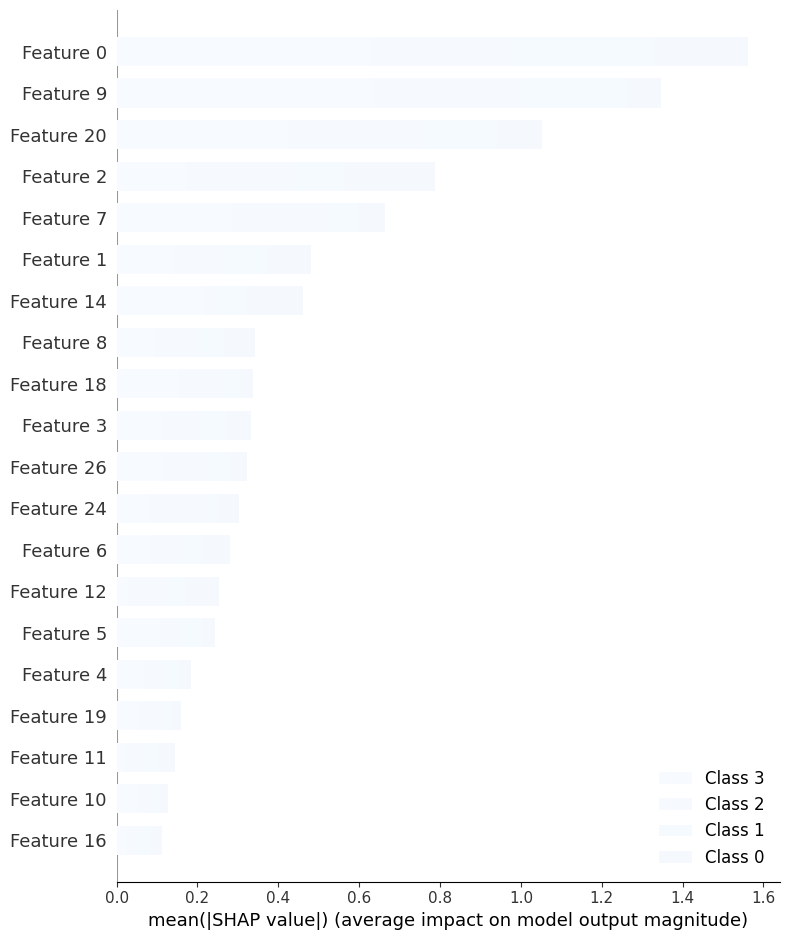

In [ ]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_val_pred_encoded = model.predict(X_val_split)

# Convert y_val_encoded back to original labels
y_val_original = label_encoder.inverse_transform(y_val_split.reshape(-1, 1))  # Reshape labels

# Convert encoded predictions back to original labels
y_val_pred_original = label_encoder.inverse_transform(y_val_pred_encoded.reshape(-1, 1))  # Reshape predictions

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val_original, y_val_pred_original)
confusion = confusion_matrix(y_val_original, y_val_pred_original)
classification_rep = classification_report(y_val_original, y_val_pred_original, zero_division=1)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

# Calculate SHAP values using LinearExplainer
shap.LinearExplainer(model, X_train_split)
shap_values = explainer.shap_values(X_val_split)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_val_split, plot_type="bar", color=plt.get_cmap('Blues'))


# **5. Random Forest (Ensemble)**

Accuracy: 0.4940107393638992
Confusion Matrix:
 [[225 131  92 149]
 [133 196 151  72]
 [ 70 145 288  77]
 [106  54  45 487]]
Classification Report:
               precision    recall  f1-score   support

           A       0.42      0.38      0.40       597
           B       0.37      0.36      0.36       552
           C       0.50      0.50      0.50       580
           D       0.62      0.70      0.66       692

    accuracy                           0.49      2421
   macro avg       0.48      0.48      0.48      2421
weighted avg       0.49      0.49      0.49      2421



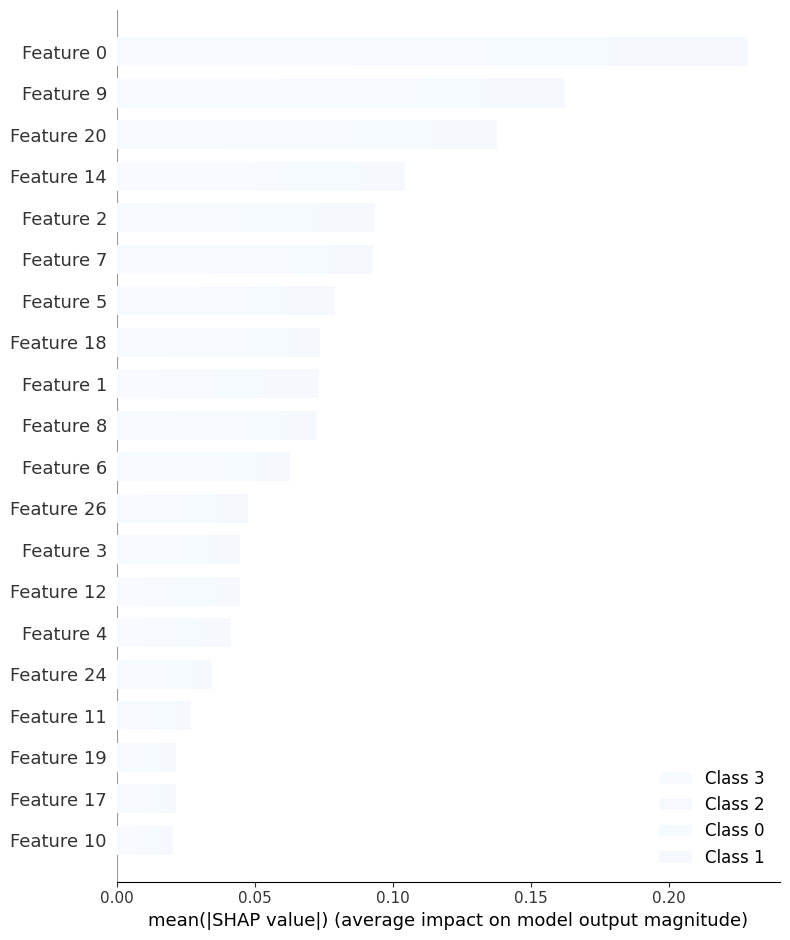

In [ ]:
# Initialize and train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_val_pred_encoded = model.predict(X_val_split)

# Convert y_val_encoded back to original labels
y_val_original = label_encoder.inverse_transform(y_val_split.reshape(-1, 1))  # Reshape labels

# Convert encoded predictions back to original labels
y_val_pred_original = label_encoder.inverse_transform(y_val_pred_encoded.reshape(-1, 1))  # Reshape predictions

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val_original, y_val_pred_original)
confusion = confusion_matrix(y_val_original, y_val_pred_original)
classification_rep = classification_report(y_val_original, y_val_pred_original, zero_division=1)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

# Calculate SHAP values using TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val_split)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_val_split, plot_type="bar", color=plt.get_cmap('Blues'))

# **6. Decision Tree**

Accuracy: 0.4316398182569186
Confusion Matrix:
 [[217 137 113 130]
 [173 178 132  69]
 [ 99 171 248  62]
 [155  76  59 402]]
Classification Report:
               precision    recall  f1-score   support

           A       0.34      0.36      0.35       597
           B       0.32      0.32      0.32       552
           C       0.45      0.43      0.44       580
           D       0.61      0.58      0.59       692

    accuracy                           0.43      2421
   macro avg       0.43      0.42      0.43      2421
weighted avg       0.44      0.43      0.43      2421



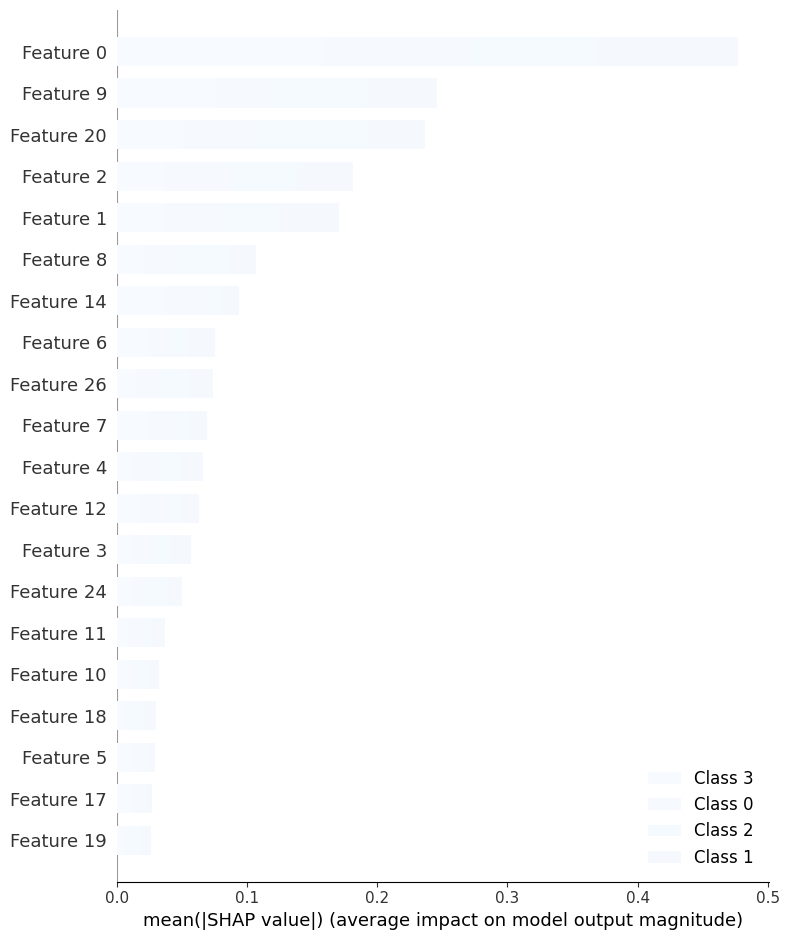

In [ ]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_val_pred_encoded = model.predict(X_val_split)

# Convert y_val_encoded back to original labels
y_val_original = label_encoder.inverse_transform(y_val_split.reshape(-1, 1))  # Reshape labels

# Convert encoded predictions back to original labels
y_val_pred_original = label_encoder.inverse_transform(y_val_pred_encoded.reshape(-1, 1))  # Reshape predictions

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val_original, y_val_pred_original)
confusion = confusion_matrix(y_val_original, y_val_pred_original)
classification_rep = classification_report(y_val_original, y_val_pred_original, zero_division=1)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

# Calculate SHAP values using TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val_split)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_val_split, plot_type="bar", color=plt.get_cmap('Blues')

# **Generating PDF Reports**

In [ ]:
!pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.0 MB/s eta 0:00:00


In [ ]:
pip install imgkit

In [ ]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40702 sha256=78fc0f94144c123de098bb003d2bf0932cf48b16e160defa5b9d8b508e36c5ef
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


The following report generation code in PDF can be extended to the other models as well

In [ ]:
from fpdf import FPDF
import shap
import IPython.display as display
from contextlib import redirect_stdout
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import io
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train_split, y_train_split)

# Calculate SHAP values using TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val_split)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_val_split, plot_type="bar", show=False)
shap_summary_plot_image_path = "shap_summary_plot.png"

# Save SHAP summary plot as a PNG image
plt.savefig(shap_summary_plot_image_path, bbox_inches='tight')
plt.close()

# Create a PDF report using fpdf
pdf = FPDF()
pdf.add_page()
pdf.set_auto_page_break(auto=True, margin=15)

# Add custom logo
pdf.image("images.png", x=10, y=10, w=50)
pdf.ln(60)

# Add heading
pdf.set_font("Arial", "B", 16)
pdf.cell(0, 1, "Evaluation Of Decision Tree Metrics", 0, 1, "C")
pdf.ln(10)

# Add captured output
output_string = ""
with io.StringIO() as buf, redirect_stdout(buf):
    # Your previous code for evaluation and printing metrics
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion)
    print("Classification Report:\n", classification_rep)
    output_string = buf.getvalue()

pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, output_string)
pdf.ln(10)

# Add SHAP summary plot image
pdf.image(shap_summary_plot_image_path, x=10, w=190)
pdf.ln(140)

# Save the PDF report
pdf_output_path = "decision_tree_evaluation_report.pdf"
pdf.output(pdf_output_path)

''